In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [12]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
encoder = LabelEncoder()
df['species']=encoder.fit_transform(df['species'])

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df = df[['sepal_length','petal_length','species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [16]:
x =df.iloc[:,0:2]
y =df.iloc[:,-1] 

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [22]:
clf = LogisticRegression(multi_class='multinomial')

In [23]:
clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [24]:
y_pred = clf.predict(x_test)

In [25]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [26]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,12,0,0
1,0,12,1
2,0,0,5


In [29]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.82845922e-01, 2.16888169e-01, 2.65909205e-04]])

In [30]:
clf.predict(query)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


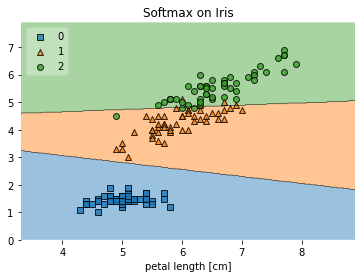

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values,clf,legend=2)

# Adding axes annoatations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()
